# King County House Sales dataset

## Initial Setup

**Libraries used:** NumPy, Pandas, Pandas-Profiling, SciPy, Seaborn, MatPlotLib, Folium, Cufflinks, Datetime, Sweetviz

In [299]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import sweetviz as sv

import cufflinks as cf
from datetime import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 25)
pd.set_option('display.float_format', '{:,}'.format)

sns.set_style('darkgrid')

%matplotlib inline

### Importing the House Sales data

The dataset contains sales data of houses sold in King County, WA from May 2014 to May 2015, consisting of 21,597 rows and 21 columns. A list of all column names and their descriptions are outlined in the [kchouse_columns](kchouse_columns.ipynb) notebook. 

In [5]:
# Importing the King County House Sales csv into a dataframe with Pandas and assigning it to the variable kchouse_df
kchouse_df = pd.read_csv('kc_house_data.csv')

# Verifying dataset has been imported correctly as a dataframe using the first five rows of data
kchouse_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639
2,5631500400,2/25/2015,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,nan,98028,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
#calling overall shape of the dataframe
kchouse_df.shape

(21597, 21)

In [242]:
kchouse_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Cleaning & EDA

### Initial cleaning and EDA

In [6]:
#print summary of dataframe
kchouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [127]:
#return unique count of datatypes
kchouse_df.dtypes.value_counts()

int64      11
float64     8
object      2
dtype: int64

In [130]:
#return all object datatype columns
kchouse_df.select_dtypes(include='object').columns

Index(['date', 'sqft_basement'], dtype='object')

In [126]:
#checking for the sum of missing values and percentages within each column
for col in kchouse_df:
    mv = kchouse_df[col].isna().sum()
    if mv > 0:
        print(f'{col} column has {mv} missing values')

waterfront column has 2376 missing values
view column has 63 missing values
yr_renovated column has 3842 missing values


In [40]:
#checking for duplicate rows across all columns
duplicate_rows = kchouse_df[kchouse_df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows in the dataframe.")

The are 0 duplicate rows in the dataframe.


In [205]:
#checking for duplicate values within each column
for col in kchouse_df:
    dupe = kchouse_df[col].duplicated().sum()
    dupe_per = round(kchouse_df[col].duplicated().sum()/len(kchouse_df) * 100, 3)
    print(f'{col} | {dupe} | {dupe_per}%')

id | 177 | 0.82%
date | 21225 | 98.278%
price | 17975 | 83.229%
bedrooms | 21585 | 99.944%
bathrooms | 21568 | 99.866%
sqft_living | 20563 | 95.212%
sqft_lot | 11821 | 54.734%
floors | 21591 | 99.972%
waterfront | 21595 | 99.991%
view | 21592 | 99.977%
condition | 21592 | 99.977%
grade | 21586 | 99.949%
sqft_above | 20655 | 95.638%
sqft_basement | 21294 | 98.597%
yr_built | 21481 | 99.463%
yr_renovated | 21527 | 99.676%
zipcode | 21527 | 99.676%
lat | 16564 | 76.696%
long | 20846 | 96.523%
sqft_living15 | 20820 | 96.402%
sqft_lot15 | 12915 | 59.8%


In [22]:
#call descriptive statistics of dataframe
kchouse_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","19,221.0","21,534.0","21,597.0","21,597.0","21,597.0","21,597.0","17,755.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0"
mean,"4,580,474,287.770987","540,296.5735055795",3.3731999814789093,2.1158262721674306,"2,080.3218502569803","15,099.408760475992",1.4940964022780943,0.007595858696217679,0.23386272870808952,3.4098254387183404,7.657915451220076,"1,788.5968421540028","1,970.9996758809093",83.6367783722895,"98,077.95184516368",47.56009299439737,-122.2139824975691,"1,986.6203176367087","12,758.283511598833"
std,"2,876,735,715.74778","367,368.1401013945",0.9262988945421479,0.7689842966527209,918.1061250800805,"41,412.636875502074",0.5396827909775457,0.08682484570054606,0.7656862011746727,0.6505456356725546,1.1731996637760254,827.7597611646754,29.375234132441644,399.9464138788162,53.51307235352816,0.13855176817307177,0.14072352882947373,685.2304719001586,"27,274.441950386343"
min,"1,000,102.0","78,000.0",1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,"1,900.0",0.0,"98,001.0",47.1559,-122.51899999999999,399.0,651.0
25%,"2,123,049,175.0","322,000.0",3.0,1.75,"1,430.0","5,040.0",1.0,0.0,0.0,3.0,7.0,"1,190.0","1,951.0",0.0,"98,033.0",47.4711,-122.32799999999999,"1,490.0","5,100.0"
50%,"3,904,930,410.0","450,000.0",3.0,2.25,"1,910.0","7,618.0",1.5,0.0,0.0,3.0,7.0,"1,560.0","1,975.0",0.0,"98,065.0",47.5718,-122.23100000000001,"1,840.0","7,620.0"
75%,"7,308,900,490.0","645,000.0",4.0,2.5,"2,550.0","10,685.0",2.0,0.0,0.0,4.0,8.0,"2,210.0","1,997.0",0.0,"98,118.0",47.678000000000004,-122.125,"2,360.0","10,083.0"
max,"9,900,000,190.0","7,700,000.0",33.0,8.0,"13,540.0","1,651,359.0",3.5,1.0,4.0,5.0,13.0,"9,410.0","2,015.0","2,015.0","98,199.0",47.7776,-121.315,"6,210.0","871,200.0"


In [124]:
#define function to iterate through columns for custom descriptive statistics table
def eda_table(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isna().sum()
    eda_df['null_prct'] = df.isna().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

In [125]:
#call function on dataframe
eda_table(kchouse_df)

,null_sum,null_prct,dtypes,count,mean,median,min,max
bathrooms,0,0.0,float64,21597,2.1158262721674306,2.25,0.5,8.0
bedrooms,0,0.0,int64,21597,3.3731999814789093,3.0,1,33
condition,0,0.0,int64,21597,3.4098254387183404,3.0,1,5
date,0,0.0,object,21597,nan,nan,1/10/2015,9/9/2014
floors,0,0.0,float64,21597,1.4940964022780943,1.5,1.0,3.5
grade,0,0.0,int64,21597,7.657915451220076,7.0,3,13
id,0,0.0,int64,21597,"4,580,474,287.770987","3,904,930,410.0",1000102,9900000190
lat,0,0.0,float64,21597,47.56009299439737,47.5718,47.1559,47.7776
long,0,0.0,float64,21597,-122.2139824975691,-122.23100000000001,-122.51899999999999,-121.315
price,0,0.0,float64,21597,"540,296.5735055795","450,000.0","78,000.0","7,700,000.0"


In [59]:
#check the number unique values as a percentage of total column values
for col in kchouse_df.columns:
    print(col)
    print(kchouse_df[col].value_counts(normalize=True) * 100)
    print('\n')

id
795000620    0.013890818169190166
1825069031   0.009260545446126776
2019200220   0.009260545446126776
7129304540   0.009260545446126776
1781500435   0.009260545446126776
                     ...         
7812801125   0.004630272723063388
4364700875   0.004630272723063388
3021059276   0.004630272723063388
880000205    0.004630272723063388
1777500160   0.004630272723063388
Name: id, Length: 21420, dtype: float64


date
6/23/2014     0.6574987266750012
6/26/2014     0.6065657267213038
6/25/2014     0.6065657267213038
7/8/2014      0.5880446358290503
4/27/2015     0.5834143631059869
                    ...         
5/24/2015   0.004630272723063388
1/10/2015   0.004630272723063388
11/2/2014   0.004630272723063388
2/15/2015   0.004630272723063388
8/30/2014   0.004630272723063388
Name: date, Length: 372, dtype: float64


price
350,000.0     0.7964069083669028
450,000.0     0.7964069083669028
550,000.0     0.7362133629670787
500,000.0      0.703801453905635
425,000.0     0.6945409084595082


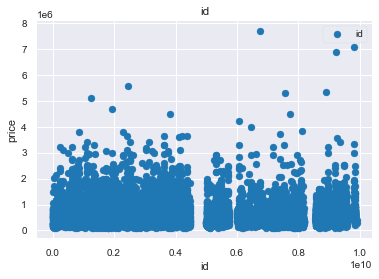

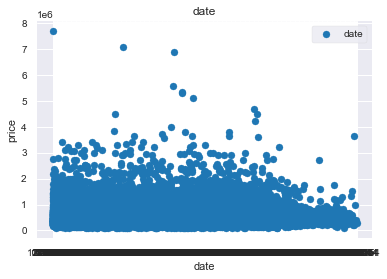

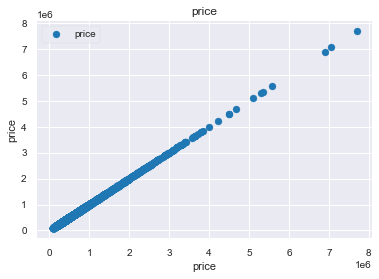

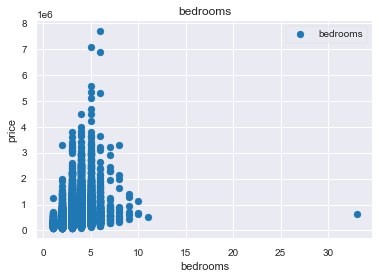

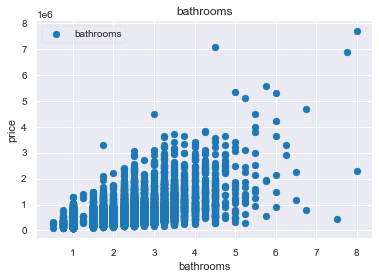

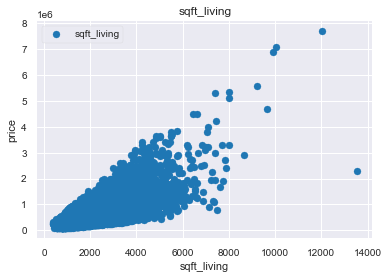

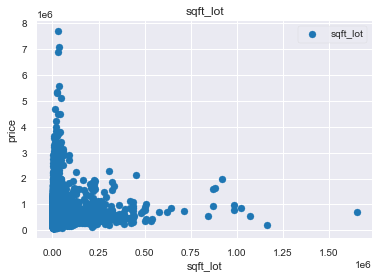

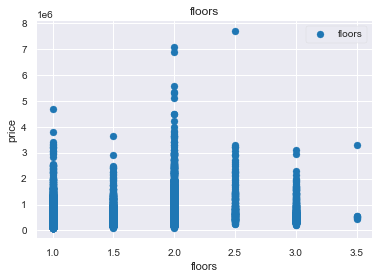

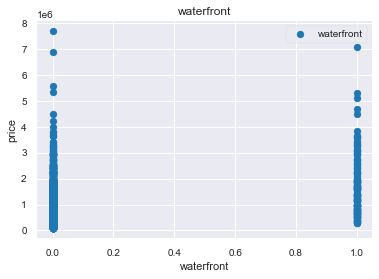

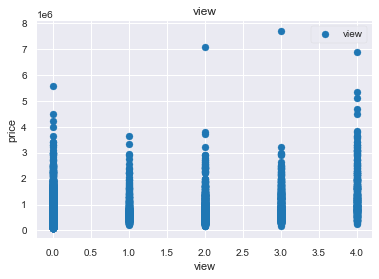

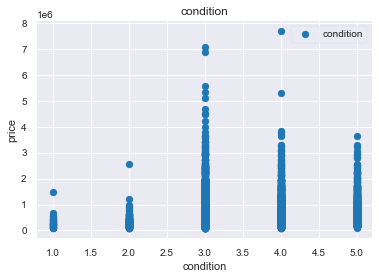

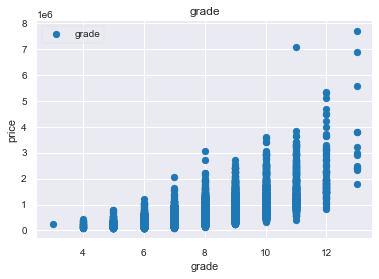

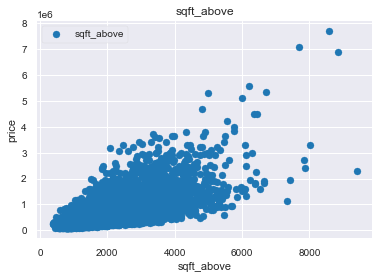

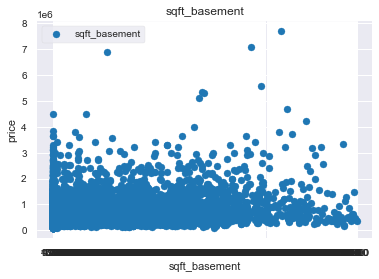

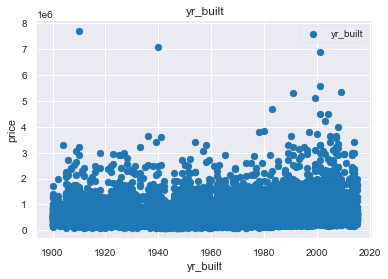

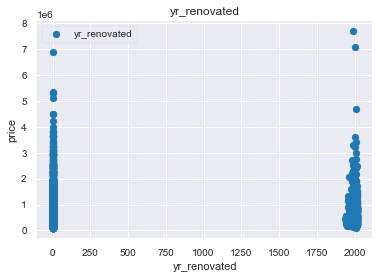

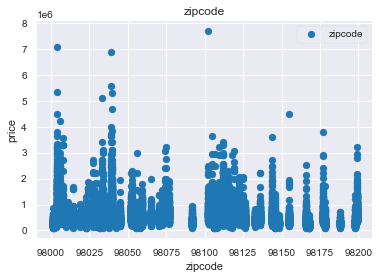

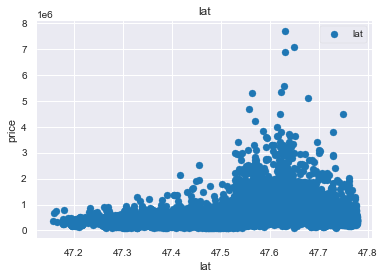

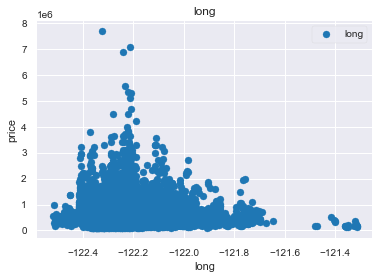

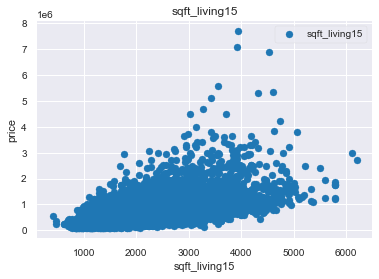

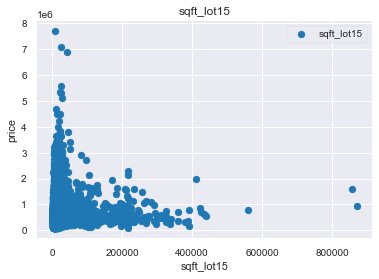

In [61]:
#create scatterplots for each column against target variable of price
for col in kchouse_df.columns: 
    plt.scatter(kchouse_df[col], kchouse_df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

### Pandas Profiling Report on initial King County House Sale dataset
[kchouseprofile_initial.html](kchouseprofile_initial.html)

### Initial Observations 
<li>missing/null values in waterfront, view, and yr_renovated columns</li>
<li>object datatypes for date and sqft_basement: categorical and numeric columns</li>
<li>sqft_basement with ? values</li>
<li>duplicate values in id column that accounts for < 1% of the data</li>
<li>outlier in bedrooms - 33!</li> 
<li>possible correlations with price: bathrooms, sqft_living, grade, sqft_above, latitude, sqft_living15

### Dealing with missing/null Values

waterfront column has 2376 missing values <br>
view column has 63 missing values<br>
yr_renovated column has 3842 missing values<br>

In [95]:
#call null values in dataframe
kchouse_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [164]:
#set null values to 0 
kchouse_df['waterfront'].fillna(0, inplace=True)
kchouse_df['view'].fillna(0, inplace=True)
kchouse_df['yr_renovated'].fillna(0, inplace=True)

In [152]:
kchouse_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Dealing with object datatypes

object datatypes for date and sqft_basement: categorical and numeric columns

In [161]:
#convert date col object strings to datetime objects and call first 5 rows
kchouse_df['date'] = pd.to_datetime(kchouse_df.date, format='%m/%d/%Y')

In [162]:
#convert sqft_basement object strings to numerical datatype
kchouse_df['sqft_basement'] = pd.to_numeric(kchouse_df['sqft_basement'], errors='coerce')

In [163]:
#call datatypes
kchouse_df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Dealing with sqft_basement ? values

In [165]:
#set null values to 0 
kchouse_df['sqft_basement'].fillna(0, inplace=True)

In [179]:
#verifying replaced ? values
kchouse_df.sqft_basement.value_counts(bins=10)

(-4.821000000000001, 482.0]    15669
(482.0, 964.0]                  3801
(964.0, 1446.0]                 1697
(1446.0, 1928.0]                 341
(1928.0, 2410.0]                  71
(2410.0, 2892.0]                  12
(3374.0, 3856.0]                   2
(2892.0, 3374.0]                   2
(4338.0, 4820.0]                   1
(3856.0, 4338.0]                   1
Name: sqft_basement, dtype: int64

### Dealing with outliers

outlier in bedrooms - 33!

In [218]:
#call row with to 33 bedrooms
kchouse_df.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,"640,000.0",33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Given the property listing for id 2402100895, it seems the 33 bedrooms might be due to human error and should be 3 bedrooms.

In [219]:
#change 33 bedroom outlier to 3 bedrooms
kchouse_df.bedrooms[kchouse_df.bedrooms == 33] = 3

In [220]:
#call updated property id
kchouse_df.query('id == 2402100895')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,"640,000.0",3,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Exporting out base dataset

In [226]:
#save cleaned dataframe as new csv file
kchouse_base = kchouse_df 
#kchouse_df.to_csv('kchouse_base.csv')

## Initial visualizations

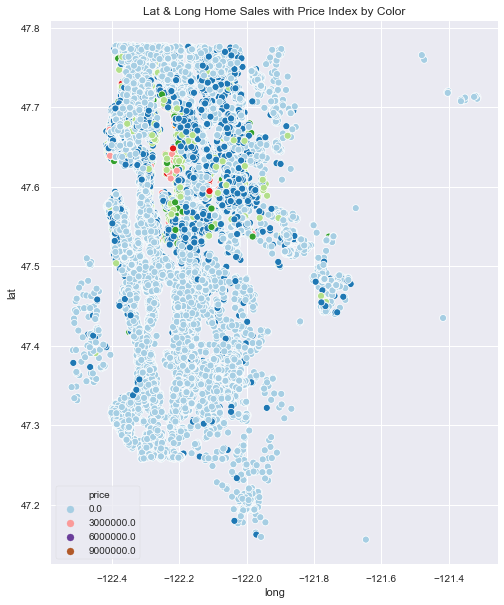

In [237]:
#create plot of map coordinates from dataframe
plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=kchouse_base, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'

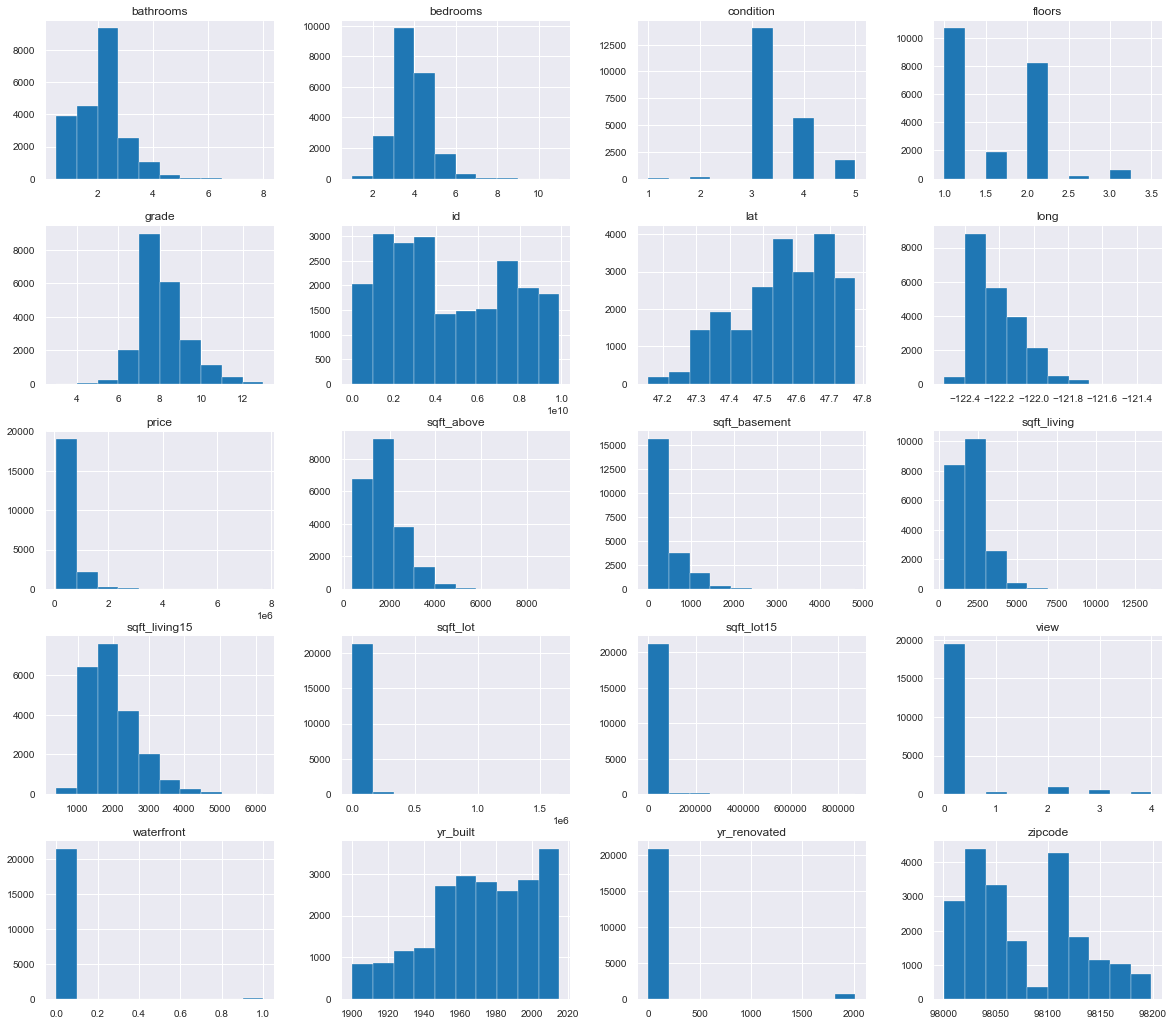

In [238]:
#create histograms from dataframe
kchouse_base.hist(figsize=(20,18))

#### Sweet Viz visualization

In [240]:
#create sweet viz visualizations and export to html
#sweetviz_base = sv.analyze(kchouse_base, target_feat = 'price')
#sweetviz_base.show_html('sweetviz_base.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report sweetviz_base.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


##### Link to baseline Sweet Viz visualizations: [sweetviz_base.html](sweetviz_base.html)

#### Pandas Profiling base report

##### Link to baseline profile: [kchouseprofile_base.html](kchouseprofile_base.html)

<AxesSubplot:>

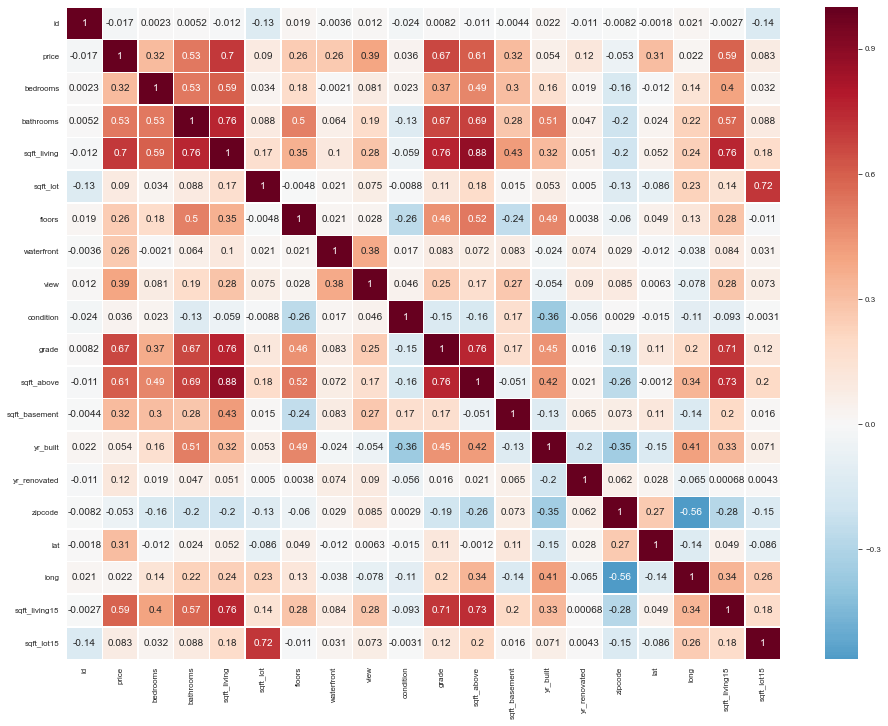

In [418]:
#create correlation heatmap to visualize collinearity
plt.figure(figsize=(16, 12))
pcorr = kchouse_base.corr()
cmap = 'RdBu_r'
sns.heatmap(pcorr, 
            xticklabels=pcorr.columns, 
            yticklabels=pcorr.columns,
            cmap=cmap,
            annot=True,
            linewidth=0.5,
            center=0)

## Baseline Model

In [235]:
#call OLS Regression summary for baseline model
data = kchouse_base
target = 'price'
x_cols = kchouse_base.drop([target, 'date','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = target + '~' + predictors

model = smf.ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2805.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        08:13:55   Log-Likelihood:            -2.9437e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.012e+06   2.93e+06      2.394      0.017    1.27e+06    1.28e+07
bedrooms      -3.927e+04   1978.729    -19.848      0.000   -4.32e+04   -3.54e+04
bathrooms      4.271e+04   3264.908     13.082      0.000    3.63e+04    4.91e+04
sqft_living     105.1993     18.065      5.823      0.000      69.790     140.608
sqft_lot          0.1257      0.048      2.625      0.009       0.032       0.220
floors         6903.1586   3597.639      1.919      0.055    -148.480     1.4e+04
waterfront     6.167e+05   1.81e+04     34.031      0.000    5.81e+05    6.52e+05
view           5.302e+04   2120.714     25.000      0.000    4.89e+04    5.72e+04
condition      2.679e+04   2344.216     11.426      0.000    2.22e+04    3.14e+04
grade          9.639e+04   2160.483     44.613      0.000    9.22e+04    1.01e+05
sqft_above       77.6563     18.052      4.302      0.000      42.273     113.039
sqft_basement    47.3419     17.891      2.646      0.008      12.273      82.411
yr_built      -2647.3323     71.888    -36.826      0.000   -2788.239   -2506.426
yr_renovated     23.3683      3.974      5.880      0.000      15.579      31.158
zipcode        -587.3000     32.966    -17.815      0.000    -651.915    -522.685
lat            5.995e+05   1.07e+04     55.876      0.000    5.79e+05    6.21e+05
long          -2.177e+05   1.31e+04    -16.563      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5425      3.448      6.249      0.000      14.785      28.300
sqft_lot15       -0.3934      0.073     -5.367      0.000      -0.537      -0.250
==============================================================================
Omnibus:                    18266.149   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1810077.584
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      47.287   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Baseline Observations


<li>R-squared value = .701</li>
<li>high p-value for floors column</li>

## Features and Transformations

From initial observations, possible correlations with price: 
<li>bathrooms</li>
<li>sqft_living</li>
<li>grade</li>
<li>sqft_above</li>
<li>latitude</li>
<li>sqft_living15</li>
<br>
sqft_above is likely dependent on sqft_living. 

### Adding Cities by Zipcode

In [267]:
#importing zipcode by city csv in dataframe
kczipcity_df = pd.read_csv('kc_city_zip.csv')
kczipcity_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [268]:
#create new dataframe by joining the baseline with the cities on zipcode
kchouse_cities = pd.merge(left=kchouse_base, right=kczipcity_df, how='left', left_on='zipcode', right_on='zipcode')
kchouse_cities.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062,Kenmore
3,2487200875,2014-12-09,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000,Seattle
4,1954400510,2015-02-18,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish


In [284]:
#return summary stats for cities 
kchouse_cities.groupby('city').describe()

id                                              \
                count                  mean                   std   
city                                                                
Auburn          911.0  4,391,561,101.743139 2,621,595,218.8806214   
Bellevue      1,407.0  4,588,338,529.041933 2,885,039,700.0034976   
Black Diamond   100.0      3,879,195,406.67 2,428,714,466.2755647   
Bothell         195.0 4,284,960,781.1076922 3,013,550,236.6414323   
Carnation       124.0 4,240,655,613.4919353  2,897,836,737.169101   
Duvall          190.0  3,137,917,864.836842  2,458,831,056.923274   
Enumclaw        233.0  4,014,550,115.064378 2,665,955,754.0153384   
Fall City        80.0      2,802,980,843.95 2,055,222,045.0486171   
Federal Way     779.0  5,200,648,122.595635 3,129,100,179.9674997   
Issaquah        733.0  4,882,344,448.540246 2,656,710,734.3133082   
Kenmore         283.0  4,415,450,815.212014  2,636,876,059.906162   
Kent          1,201.0  4,587,595,856.955037  2,842,248,759.152632   
Kirkland        977.0  4,050,049,508.701126 2,607,251,850.2499137   
Maple Valley    589.0 4,129,010,039.2037354  2,834,228,482.421144   
Medina           50.0      3,755,708,209.12 1,658,801,573.5301495   
Mercer Island   282.0 4,199,322,940.6631207   2,330,590,758.52713   
North Bend      220.0  5,017,308,158.918181 3,525,319,989.9147325   
Redmond         977.0    5,301,261,366.0174  3,113,687,795.049796   
Renton        1,597.0  4,324,540,614.540388  2,848,397,603.867124   
Sammamish       800.0    4,881,567,672.7725 3,156,961,664.0224814   
Seattle       8,973.0  4,603,227,499.785133 2,843,007,448.2474337   
Snoqualmie      308.0  7,390,800,180.081169 1,416,944,414.4006326   
Vashon          117.0  3,267,469,353.905983 2,374,764,380.1406837   
Woodinville     471.0  3,725,080,213.566879  3,103,272,494.393634   

                                                                \
                          min              25%             50%   
city                                                             
Auburn            1,000,102.0  2,414,829,584.5 3,751,604,974.0   
Bellevue         11,200,070.0  2,205,500,207.5 4,038,700,730.0   
Black Diamond   321,079,066.0 1,598,551,818.75 3,622,069,099.0   
Bothell         200,500,410.0  1,387,300,320.0 4,178,600,040.0   
Carnation       203,600,140.0 1,825,079,035.75 4,045,500,712.5   
Duvall          112,900,020.0  1,518,000,245.0 2,131,701,157.5   
Enumclaw        120,069,003.0  1,920,079,062.0 3,220,079,017.0   
Fall City        98,300,230.0 1,524,079,140.25 2,324,079,065.0   
Federal Way     100,500,020.0  2,229,800,415.0 5,152,700,060.0   
Issaquah        291,300,010.0  3,424,069,145.0 3,904,950,190.0   
Kenmore         114,100,131.0  3,578,600,101.5 4,019,500,030.0   
Kent              6,200,017.0  1,941,400,080.0 3,832,070,040.0   
Kirkland         11,300,120.0  2,026,059,119.0 3,754,500,566.0   
Maple Valley    122,069,107.0  1,565,930,130.0 3,303,950,760.0   
Medina        2,210,500,010.0  2,525,049,172.5 3,262,300,520.0   
Mercer Island    31,000,165.0  2,524,049,027.5 4,115,700,628.5   
North Bend      192,300,020.0  1,442,880,370.0 5,506,500,120.0   
Redmond          11,500,240.0  2,325,069,032.0 6,870,300,090.0   
Renton            7,200,080.0  1,823,069,213.0 3,343,901,440.0   
Sammamish        98,000,060.0  1,853,081,202.5 5,411,600,195.0   
Seattle           1,200,019.0  2,171,400,218.0 4,022,906,430.0   
Snoqualmie      123,079,023.0  7,852,020,587.5 7,852,180,605.0   
Vashon          121,029,034.0  1,823,039,205.0 2,817,100,430.0   
Woodinville     126,059,005.0  1,426,515,126.5 1,926,069,143.0   

                                                 price                       \
                           75%             max   count                 mean   
city                                                                          
Auburn         7,137,970,170.0 9,543,000,945.0   911.0   291,647.8199780461   
Bellevue       7,732,410,175.0 9,809,000,020.0 1,407.0  

In [272]:
#group dataframe by city
kchouse_cities.groupby('city').sum()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
city,,,,,,,,,,,,,,,,,,,,
Auburn,4000712163688,"265,691,164.0",3116,"1,878.5",1781864,18304715,"1,345.0",0.0,84.0,3114,6722,1650028,"131,156.0",1804954,"27,942.0",89311051,"43,095.97890000006","-111,341.1489999998",1702631,16163597
Bellevue,6455792310362,"1,264,141,779.0",5377,"3,378.75",3718309,18553797,"1,929.5",14.0,566.0,5101,11849,3026278,"682,371.0",2775667,"118,058.0",137894347,"66,964.61300000001","-171,873.086",3538096,17238488
Black Diamond,387919540667,"42,366,599.0",329,202.75,213759,5546530,148.0,0.0,10.0,353,740,200034,"13,145.0",197918,"19,837.0",9801000,"4,733.321000000002","-12,199.947",200876,4783027
Bothell,835567352316,"95,623,536.0",692,444.25,439354,2206257,293.0,0.0,12.0,628,1516,381139,"57,935.0",386519,"7,928.0",19112145,"9,312.2625","-23,829.229000000003",438375,1854857
Carnation,525841296073,"56,496,522.0",372,254.0,262628,12015955,186.5,0.0,23.0,391,916,245958,"16,180.0",245635,"3,992.0",12153736,"5,911.264499999998","-15,109.218000000006",239198,9669473
Duvall,596204394319,"80,714,862.0",639,435.25,412596,7569293,327.0,0.0,4.0,584,1427,386886,"25,710.0",378412,"7,976.0",18623610,"9,070.048200000005","-23,171.417999999994",399707,7033137
Enumclaw,935390176810,"73,800,977.0",736,447.0,428094,17296502,308.5,0.0,147.0,870,1672,402584,"25,510.0",459369,"25,880.0",22839126,"11,000.21559999999","-28,424.962999999978",419760,11996802
Fall City,224238467516,"46,889,670.0",267,175.25,189045,8218835,114.0,0.0,19.0,261,609,176160,"12,885.0",157717,"7,976.0",7841920,"3,804.7010999999998","-9,752.438000000004",170766,6358749
Federal Way,4051304887502,"225,435,821.0",2649,"1,602.0",1532962,8193501,"1,027.5",3.0,119.0,2634,5892,1316975,"211,897.0",1540954,"13,926.0",76354317,"36,855.41009999999","-95,306.59200000006",1505237,7586897


In [283]:
#group dataframe by city by median price
kchouse_cities.groupby('city')['price'].median()

city
Auburn            270,000.0
Bellevue          749,000.0
Black Diamond     359,999.5
Bothell           470,000.0
Carnation         415,000.0
Duvall            401,250.0
Enumclaw          280,000.0
Fall City         462,500.0
Federal Way       268,000.0
Issaquah          572,000.0
Kenmore           445,000.0
Kent              283,000.0
Kirkland          510,000.0
Maple Valley      342,000.0
Medina          1,895,000.0
Mercer Island     993,750.0
North Bend        404,750.0
Redmond           625,000.0
Renton            358,000.0
Sammamish         688,500.0
Seattle           453,000.0
Snoqualmie        502,500.0
Vashon            465,000.0
Woodinville       570,000.0
Name: price, dtype: float64

In [285]:
#group dataframe by city by median price
kchouse_cities.groupby('city')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Auburn,911.0,"291,647.8199780461","108,421.78012876672","90,000.0","224,250.0","270,000.0","332,550.0","930,000.0"
Bellevue,"1,407.0","898,466.0831556503","559,781.8122975279","247,500.0","550,000.0","749,000.0","999,974.5","7,060,000.0"
Black Diamond,100.0,"423,665.99","195,414.98276229948","135,000.0","256,750.0","359,999.5","592,500.0","935,000.0"
Bothell,195.0,"490,377.1076923077","121,970.78686039543","245,500.0","412,400.0","470,000.0","550,000.0","1,080,000.0"
Carnation,124.0,"455,617.1129032258","258,603.42393995257","80,000.0","308,500.0","415,000.0","536,000.0","1,680,000.0"
Duvall,190.0,"424,815.06315789477","130,638.25698614071","119,500.0","330,168.75","401,250.0","499,987.5","1,020,000.0"
Enumclaw,233.0,"316,742.3905579399","122,328.9394245304","122,000.0","235,000.0","280,000.0","350,000.0","858,000.0"
Fall City,80.0,"586,120.875","376,718.73313326016","200,000.0","340,000.0","462,500.0","702,500.0","1,860,000.0"
Federal Way,779.0,"289,391.29781771504","108,398.64613767962","86,500.0","225,450.0","268,000.0","320,000.0","1,280,000.0"


R-squared value up to .755

#### OLS - Cities

In [395]:
#call OLS Regression summary
data = kchouse_cities
target = 'price'
x_cols = kchouse_cities.drop([target, 'date','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = target + '~' + predictors

model = smf.ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1621.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:28:22   Log-Likelihood:            -2.9220e+05
No. Observations:               21597   AIC:                         5.845e+05
Df Residuals:                   21555   BIC:                         5.848e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.423e+07   7.95e+06      9.341      0.000    5.87e+07    8.98e+07
city[T.Bellevue]       1.997e+05   9976.349     20.017      0.000     1.8e+05    2.19e+05
city[T.Black Diamond]  1.029e+05   2.04e+04      5.033      0.000    6.28e+04    1.43e+05
city[T.Bothell]       -1.254e+05   1.69e+04     -7.437      0.000   -1.58e+05   -9.23e+04
city[T.Carnation]      3.615e+04   2.23e+04      1.622      0.105   -7524.268    7.98e+04
city[T.Duvall]        -4.054e+04   1.88e+04     -2.151      0.031   -7.75e+04   -3597.298
city[T.Enumclaw]       1.019e+05   1.53e+04      6.679      0.000     7.2e+04    1.32e+05
city[T.Fall City]      1.282e+05    2.4e+04      5.341      0.000    8.12e+04    1.75e+05
city[T.Federal Way]   -9.787e+04   9713.579    -10.076      0.000   -1.17e+05   -7.88e+04
city[T.Issaquah]       1.122e+05   1.19e+04      9.464      0.000     8.9e+04    1.35e+05
city[T.Kenmore]       -1.153e+05   1.53e+04     -7.558      0.000   -1.45e+05   -8.54e+04
city[T.Kent]            230.5242   8305.500      0.028      0.978    -1.6e+04    1.65e+04
city[T.Kirkland]       8.539e+04   1.16e+04      7.361      0.000    6.27e+04    1.08e+05
city[T.Maple Valley]   7.336e+04   1.13e+04      6.505      0.000    5.13e+04    9.55e+04
city[T.Medina]         1.112e+06   2.74e+04     40.572      0.000    1.06e+06    1.17e+06
city[T.Mercer Island]  3.543e+05   1.37e+04     25.945      0.000    3.28e+05    3.81e+05
city[T.North Bend]     1.872e+05   1.99e+04      9.401      0.000    1.48e+05    2.26e+05
city[T.Redmond]        9.546e+04   1.24e+04      7.720      0.000    7.12e+04     1.2e+05
city[T.Renton]         3.349e+04   8767.418      3.819      0.000    1.63e+04    5.07e+04
city[T.Sammamish]      1.158e+05   1.28e+04      9.056      0.000    9.07e+04    1.41e+05
city[T.Seattle]        1.757e+05   1.27e+04     13.787      0.000    1.51e+05    2.01e+05
city[T.Snoqualmie]     1.341e+05   1.71e+04      7.839      0.000    1.01e+05    1.68e+05
city[T.Vashon]        -7.844e+04   2.02e+04     -3.877      0.000   -1.18e+05   -3.88e+04
city[T.Woodinville]    2309.8711   1.48e+04      0.156      0.876   -2.66e+04    3.13e+04
bedrooms              -3.691e+04   1801.021    -20.495      0.000   -4.04e+04   -3.34e+04
bathrooms               3.62e+04   2963.828     12.213      0.000    3.04e+04     4.2e+04
sqft_living             104.9082     16.362      6.412      0.000      72.837     136.979
sqft_lot                  0.1947      0.043      4.478      0.000       0.109       0.280
floors                -4125.8699   3425.672     -1.204      0.228   -1.08e+04    2588.701
waterfront             6.415e+05   1.66e+04     38.727      0.000    6.09e+05    6.74e+05
view                   4.846e+04   1943.063     24.941      0.000    4.47e+04    5.23e+04
condition              

Change of R-squared value to .755 from .701!

### Looking at bathrooms

In [300]:
kchouse_cities.groupby('bathrooms').sum()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,,,,,,,,,,,,,,,,,,,
0.5,22079901967,"949,500.0",9,4940,21862,5.0,0.0,0.0,13,25,3970,970.0,7792,0.0,392491,190.1842,-489.11800000000005,6180,23379
0.75,290936726561,"20,940,502.0",135,64172,1187826,76.5,5.0,29.0,247,400,59332,"4,840.0",137986,"5,953.0",6964490,"3,375.4077","-8,677.278000000006",103952,1211459
1.0,17157972253439,"1,336,574,588.0",10152,4549297,43998279,"4,281.5",10.0,362.0,13307,25281,4215782,"327,615.0",7487967,"208,679.0",377789459,"183,165.20010000016","-470,873.951",5587809,37971619
1.25,26190572144,"5,595,950.0",20,13730,41794,17.0,1.0,9.0,31,72,11240,"2,490.0",17843,0.0,882932,428.5549,"-1,100.359",15030,46185
1.5,6560788199737,"591,625,911.0",4393,2232105,15989373,"1,949.0",2.0,177.0,5024,10310,1947389,"280,516.0",2832229,"57,714.0",141741315,"68,724.69620000005","-176,662.4140000005",2339931,14065230
1.75,13899353610054,"1,386,583,363.0",9867,5447393,46103956,"3,485.0",19.0,649.0,10984,22126,4287483,"1,139,170.0",5976026,"211,335.0",298948789,"144,971.77750000032","-372,560.3680000005",5475920,40372983
2.0,8852750044886,"883,756,657.0",6386,3467572,27459933,"2,491.0",4.0,311.0,6907,13975,2877681,"572,761.0",3785222,"231,341.0",189301539,"91,784.14740000007","-235,910.49100000013",3352087,23246629
2.25,9279994706834,"1,092,624,766.0",7013,4293993,28733902,"3,285.0",9.0,384.0,7043,15977,3592604,"689,469.0",4048526,"77,884.0",200742140,"97,364.20280000025","-250,154.478",4144500,26274162
2.5,25646984780598,"2,977,800,384.0",19106,12787518,79028025,"9,891.5",29.0,"1,030.0",17322,43810,11707053,"1,056,755.0",10706600,"212,059.0",527279528,"255,631.6058999996","-656,850.6610000003",12142021,69035588


In [326]:
#filter dataframe by bathrooms less than .75
kchouse_cities.query('bathrooms < .75')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
2259,3971701455,2014-10-03,"273,000.0",2,0.5,1180,7750,1.0,0.0,0.0,4,6,590,590.0,1945,0.0,98155,47.769,-122.316,1380,8976,Seattle
10413,7129800036,2015-01-14,"109,000.0",2,0.5,580,6900,1.0,0.0,0.0,3,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040,Seattle
11662,7987400316,2014-08-14,"255,000.0",1,0.5,880,1642,1.0,0.0,0.0,3,6,500,380.0,1910,0.0,98126,47.5732,-122.37200000000001,1410,2992,Seattle
12029,2991000160,2014-12-12,"312,500.0",4,0.5,2300,5570,2.0,0.0,0.0,3,8,2300,0.0,1996,0.0,98092,47.3285,-122.16799999999999,1820,6371,Auburn


Less than .75 baths mean these house do not have a bathtub or shower! Not good.

In [337]:
#filter dataframe by bathrooms less than .75 by id col
kchouse_cities.query('bathrooms < .75')['id']

2259     3971701455
10413    7129800036
11662    7987400316
12029    2991000160
Name: id, dtype: int64

In [330]:
#drop rows with only .5 bathrooms using row id and set to new dataframe
kchousecities_baths = kchouse_cities.drop([2259, 10413, 11662, 12029], axis=0)

In [338]:
#verify new dataframe
kchousecities_baths.query('bathrooms < .75')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city


### Condition and Grade

Looking at the definitions from the King County Assessor's office for building condition and grade, adding a feature for properties that are up to building codes and habitable: properties at condition 3 or above + grade 6 or above. <br>
Notebook: [King County House Sale Columns](kchouse_columns.ipynb)

In [351]:
#filtering dataframe by condition and grade
kchousecities_baths.query('condition >= 3' and 'grade >= 6').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062,Kenmore
3,2487200875,2014-12-09,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000,Seattle
4,1954400510,2015-02-18,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish


In [352]:
#new dataframe
kchouse_livable = kchousecities_baths

In [354]:
#create new col by filtering out by condition and grade
kchouse_livable['livable'] = '0'
kchouse_livable.loc[(kchouse_livable['condition'] >= 3) & (kchouse_livable['grade'] >= 6), 'livable'] = '1'
kchouse_livable.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,livable
0,7129300520,2014-10-13,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle,1
1,6414100192,2014-12-09,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639,Seattle,1
2,5631500400,2015-02-25,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062,Kenmore,1
3,2487200875,2014-12-09,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000,Seattle,1
4,1954400510,2015-02-18,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish,1


In [356]:
kchouse_livable.query('condition < 3' and 'grade < 6').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,livable
36,9435300030,2014-05-28,"550,000.0",4,1.0,1660,34848,1.0,0.0,0.0,1,5,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467,Redmond,0
166,2009000370,2015-02-19,"269,950.0",2,1.75,1340,7250,1.0,0.0,0.0,5,5,700,640.0,1949,0.0,98198,47.408,-122.32700000000001,1830,9750,Seattle,0
263,1400300055,2015-04-28,"425,000.0",2,1.0,770,5040,1.0,0.0,0.0,3,5,770,0.0,1930,0.0,98144,47.5964,-122.29899999999999,1330,2580,Seattle,0
264,2123039032,2014-10-27,"369,900.0",1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,47.4683,-122.43799999999999,1230,14267,Vashon,0
350,7325600160,2014-06-04,"299,000.0",1,0.75,560,12120,1.0,0.0,0.0,3,4,560,0.0,1967,0.0,98014,47.675,-121.854,1300,19207,Carnation,0


### Dates to Quarters

Grouping sales by quarter bins.

In [364]:
kchouse_livable.groupby(pd.Grouper(key='date', freq='Q')).describe()

id                                                        \
             count                 mean                  std         min   
date                                                                       
2014-06-30 3,946.0 4,597,881,879.807653 2,885,400,763.234328 1,200,019.0   
2014-09-30 5,920.0 4,556,146,495.661149 2,864,752,246.736639 1,000,102.0   
2014-12-31 4,753.0 4,535,468,765.890175   2,874,872,284.5483 6,200,017.0   
2015-03-31 4,099.0 4,593,196,020.475969  2,894,590,438.53532 3,600,057.0   
2015-06-30 2,875.0 4,661,634,993.662956  2,867,661,991.27217 1,000,102.0   

                                                                             \
                       25%             50%              75%             max   
date                                                                          
2014-06-30 2,111,010,145.0 3,905,045,230.0 7,346,950,410.25 9,842,300,540.0   
2014-09-30 2,124,961,852.0 3,890,300,099.0 7,236,737,538.75 9,895,000,040.0   
2014-12-31 2,113,700,500.0 3,882,300,100.0  7,283,900,551.0 9,900,000,190.0   
2015-03-31 2,025,700,675.0 3,905,081,520.0  7,375,200,115.0 9,842,300,485.0   
2015-06-30 2,254,300,716.0 3,959,400,335.0  7,449,500,370.0 9,839,301,060.0   

             price                                                  ...  \
             count               mean                 std      min  ...   
date                                                                ...   
2014-06-30 3,946.0 553,337.1246832235 374,403.44686948427 78,000.0  ...   
2014-09-30 5,920.0      537,705.46875   362,742.896545147 85,000.0  ...   
2014-12-31 4,753.0 529,952.4222596255 373,198.16717980156 82,000.0  ...   
2015-03-31 4,099.0 529,035.3061722371 349,684.90653816593 81,000.0  ...   
2015-06-30 2,875.0 561,311.7725217391  380,637.4008967785 84,000.0  ...   

           sqft_living15                         sqft_lot15  \
                     25%     50%     75%     max      count   
date                                                          
2014-06-30       1,490.0 1,870.0 2,420.0 5,790.0    3,946.0   
2014-09-30       1,500.0 1,860.0 2,390.0 5,790.0    5,920.0   
2014-12-31       1,470.0 1,830.0 2,330.0 6,110.0    4,753.0   
2015-03-31       1,470.0 1,810.0 2,330.0 6,210.0    4,099.0   
2015-06-30       1,500.0 1,830.0 2,328.0 5,500.0    2,875.0   

                                                                           \
                          mean                 std   min      25%     50%   
date                                                                        
2014-06-30 12,880.385200202736 24,512.599681684078 750.0  5,084.5 7,684.0   
2014-09-30 12,502.600844594595 24,733.529467162378 659.0 5,098.75 7,650.0   
2014-12-31 12,970.153166421207  28,776.46437901414 651.0  5,100.0 7,538.0   
2015-03-31  12,352.83630153696 28,288.225364402802 748.0  5,200.0 7,673.0   
2015-06-30 13,354.594434782608  31,528.35626157986 750.0  5,024.0 7,538.0   

                                
                 75%       max  
date                            
2014-06-30 10,439.25 392,040.0  
2014-09-30  10,160.5 434,728.0  
2014-12-31   9,905.0 560,617.0  
2015-03-31  10,000.0 871,200.0  
2015-06-30   9,964.0 858,132.0  

[5 rows x 160 columns]

In [406]:
kchouse_qrtrs = kchouse_livable

In [407]:
kchouse_qrtrs['q2_2014'] = '0'
kchouse_qrtrs['q3_2014'] = '0'
kchouse_qrtrs['q4_2014'] = '0'
kchouse_qrtrs['q1_2015'] = '0'
kchouse_qrtrs['q2_2015'] = '0'

kchouse_qrtrs.loc[(kchouse_qrtrs['date'] <= '2014-06-30') & (kchouse_qrtrs['date'] > '2014-03-31'), 'q2_2014'] = '1'
kchouse_qrtrs.loc[(kchouse_qrtrs['date'] <= '2014-09-30') & (kchouse_qrtrs['date'] > '2014-06-30'), 'q3_2014'] = '1'
kchouse_qrtrs.loc[(kchouse_qrtrs['date'] <= '2014-12-31') & (kchouse_qrtrs['date'] > '2014-09-30'), 'q4_2014'] = '1'
kchouse_qrtrs.loc[(kchouse_qrtrs['date'] <= '2015-03-31') & (kchouse_qrtrs['date'] > '2014-12-31'), 'q1_2015'] = '1'
kchouse_qrtrs.loc[(kchouse_qrtrs['date'] <= '2015-06-30') & (kchouse_qrtrs['date'] > '2015-03-31'), 'q2_2015'] = '1'

kchouse_qrtrs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,livable,q2_2014,q3_2014,q4_2014,q1_2015,q2_2015
0,7129300520,2014-10-13,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,Seattle,1,0,0,1,0,0
1,6414100192,2014-12-09,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.721000000000004,-122.319,1690,7639,Seattle,1,0,0,1,0,0
2,5631500400,2015-02-25,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.23299999999999,2720,8062,Kenmore,1,0,0,0,1,0
3,2487200875,2014-12-09,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.39299999999999,1360,5000,Seattle,1,0,0,1,0,0
4,1954400510,2015-02-18,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,Sammamish,1,0,0,0,1,0


### Cleaning up datatypes

In [378]:
kchouse_qrtrs.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
city                     object
livable                  object
q2_2014                  object
q3_2014                  object
q4_2014                  object
q1_2015                  object
q2_2015                  object
dtype: object

In [379]:
#convert object columns to numeric data
kchouse_qrtrs['livable'] = pd.to_numeric(kchouse_qrtrs['livable'], errors='coerce')
kchouse_qrtrs['q2_2014'] = pd.to_numeric(kchouse_qrtrs['q2_2014'], errors='coerce')
kchouse_qrtrs['q3_2014'] = pd.to_numeric(kchouse_qrtrs['q3_2014'], errors='coerce')
kchouse_qrtrs['q4_2014'] = pd.to_numeric(kchouse_qrtrs['q4_2014'], errors='coerce')
kchouse_qrtrs['q1_2015'] = pd.to_numeric(kchouse_qrtrs['q1_2015'], errors='coerce')
kchouse_qrtrs['q2_2015'] = pd.to_numeric(kchouse_qrtrs['q2_2015'], errors='coerce')

kchouse_qrtrs.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
city                     object
livable                   int64
q2_2014                   int64
q3_2014                   int64
q4_2014                   int64
q1_2015                   int64
q2_2015                   int64
dtype: object

#### OLS - Bathrooms / Livable / Quarters

In [417]:
#call OLS Regression summary
data = kchouse_qrtrs
target = 'price'
x_cols = kchouse_qrtrs.drop([target, 'date','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = target + '~' + predictors

model = smf.ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1457.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:45:53   Log-Likelihood:            -2.9122e+05
No. Observations:               21593   AIC:                         5.825e+05
Df Residuals:                   21541   BIC:                         5.830e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.863e+07   6.41e+06      7.589      0.000    3.61e+07    6.12e+07
city[T.Bellevue]       1.842e+05   9583.148     19.219      0.000    1.65e+05    2.03e+05
city[T.Black Diamond]  1.053e+05   1.96e+04      5.370      0.000    6.69e+04    1.44e+05
city[T.Bothell]       -1.212e+05   1.62e+04     -7.495      0.000   -1.53e+05   -8.95e+04
city[T.Carnation]      3.126e+04   2.14e+04      1.463      0.144   -1.06e+04    7.32e+04
city[T.Duvall]        -4.004e+04   1.81e+04     -2.216      0.027   -7.55e+04   -4618.763
city[T.Enumclaw]       1.059e+05   1.46e+04      7.229      0.000    7.72e+04    1.35e+05
city[T.Fall City]      1.178e+05    2.3e+04      5.116      0.000    7.27e+04    1.63e+05
city[T.Federal Way]   -9.309e+04   9325.715     -9.982      0.000   -1.11e+05   -7.48e+04
city[T.Issaquah]       9.872e+04   1.14e+04      8.661      0.000    7.64e+04    1.21e+05
city[T.Kenmore]       -1.179e+05   1.46e+04     -8.054      0.000   -1.47e+05   -8.92e+04
city[T.Kent]          -5506.7017   7967.729     -0.691      0.489   -2.11e+04    1.01e+04
city[T.Kirkland]       7.207e+04   1.11e+04      6.469      0.000    5.02e+04    9.39e+04
city[T.Maple Valley]   7.396e+04   1.08e+04      6.826      0.000    5.27e+04    9.52e+04
city[T.Medina]         1.042e+06   2.64e+04     39.539      0.000    9.91e+05    1.09e+06
city[T.Mercer Island]  3.195e+05   1.31e+04     24.325      0.000    2.94e+05    3.45e+05
city[T.North Bend]     1.872e+05   1.91e+04      9.806      0.000     1.5e+05    2.25e+05
city[T.Redmond]        8.836e+04   1.19e+04      7.435      0.000    6.51e+04    1.12e+05
city[T.Renton]         1.906e+04   8442.441      2.258      0.024    2515.656    3.56e+04
city[T.Sammamish]      1.009e+05   1.23e+04      8.189      0.000    7.68e+04    1.25e+05
city[T.Seattle]        1.337e+05   1.25e+04     10.698      0.000    1.09e+05    1.58e+05
city[T.Snoqualmie]     1.184e+05   1.65e+04      7.171      0.000    8.61e+04    1.51e+05
city[T.Vashon]        -6.214e+04   1.95e+04     -3.192      0.001      -1e+05    -2.4e+04
city[T.Woodinville]   -5787.1867   1.42e+04     -0.407      0.684   -3.37e+04    2.21e+04
q2_2014[T.1]           9.714e+06   1.28e+06      7.580      0.000     7.2e+06    1.22e+07
q3_2014[T.1]           9.713e+06   1.28e+06      7.579      0.000     7.2e+06    1.22e+07
q4_2014[T.1]           9.713e+06   1.28e+06      7.579      0.000     7.2e+06    1.22e+07
q1_2015[T.1]           9.736e+06   1.28e+06      7.596      0.000    7.22e+06    1.22e+07
q2_2015[T.1]           9.756e+06   1.28e+06      7.612      0.000    7.24e+06    1.23e+07
bedrooms              -1.574e+04   1806.400     -8.713      0.000   -1.93e+04   -1.22e+04
bathrooms              4.267e+04   2873.245     14.851      0.000     3.7e+04    4.83e+04
sqft_living            

R-Squared value up to .775

### Categorical vs Continous data

Looking at categorical and continuous variables

In [396]:
#call custom summary stats function over updated dataframe 
eda_table(kchouse_qrtrs)

,null_sum,null_prct,dtypes,count,mean,median,min,max
bathrooms,0,0.0,float64,21593,2.1161255962580467,2.25,0.75,8.0
bedrooms,0,0.0,int64,21593,3.372018709767054,3.0,1,11
city,0,0.0,object,21593,nan,nan,Auburn,Woodinville
condition,0,0.0,int64,21593,3.409855045616635,3.0,1,5
date,0,0.0,datetime64[ns],21593,nan,nan,2014-05-02 00:00:00,2015-05-27 00:00:00
floors,0,0.0,float64,21593,1.4941416199694346,1.5,1.0,3.5
grade,0,0.0,int64,21593,7.658176260825267,7.0,3,13
id,0,0.0,int64,21593,"4,580,300,249.665308","3,904,930,240.0",1000102,9900000190
lat,0,0.0,float64,21593,47.560095595794934,47.5718,47.1559,47.7776
livable,0,0.0,int64,21593,0.9796693372852313,1.0,0,1


In [385]:
#create lists of categorical vs continuous columns using a for loop
cats = ['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'grade', 'livable', 'q2_2014', 'q3_2014', 'q4_2014', 'q1_2015', 'q2_2015', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
conts = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot15']
    
print(cats)
print(conts)

['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'grade', 'livable', 'q2_2014', 'q3_2014', 'q4_2014', 'q1_2015', 'q2_2015', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot15']


In [387]:
kchouse_conts = kchouse_qrtrs.loc[:,conts]
kchouse_cats = kchouse_qrtrs.loc[:,cats]

,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15
count,"21,593.0","21,593.0","21,593.0","21,593.0","21,593.0","21,593.0"
mean,"540,352.6882786088","1,788.7443152873616",285.7245866716065,"2,080.4784420877136","1,986.7021256888806","12,759.564210623814"
std,"367,377.5333122667",827.701596480323,439.8466288658412,918.0763766864567,685.263461032292,"27,276.78982375412"
min,"78,000.0",370.0,0.0,370.0,399.0,651.0
25%,"322,000.0","1,190.0",0.0,"1,430.0","1,490.0","5,100.0"
50%,"450,000.0","1,560.0",0.0,"1,910.0","1,840.0","7,620.0"
75%,"645,000.0","2,210.0",550.0,"2,550.0","2,360.0","10,083.0"
max,"7,700,000.0","9,410.0","4,820.0","13,540.0","6,210.0","871,200.0"


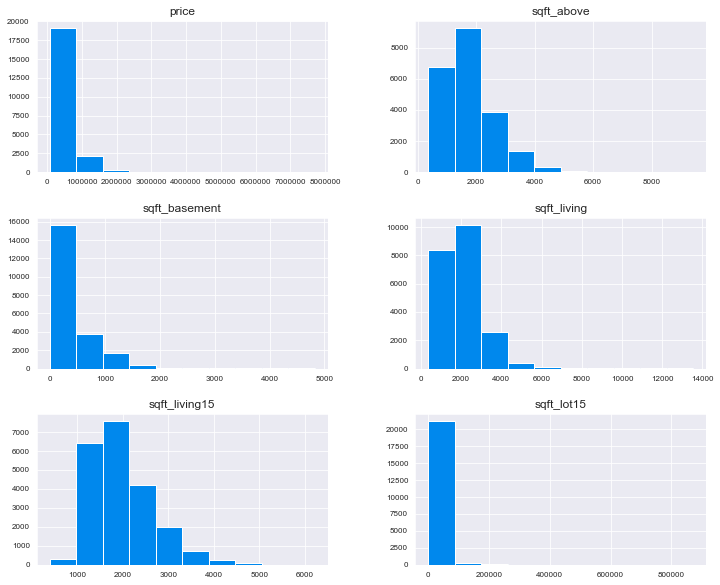

In [388]:
kchouse_conts.hist(figsize=(12,10))
kchouse_conts.describe()

### Log Transformation of continuous variables

Normalizing distributions of continuous variable data.

In [408]:
log_kchouse_qrtrs = kchouse_qrtrs

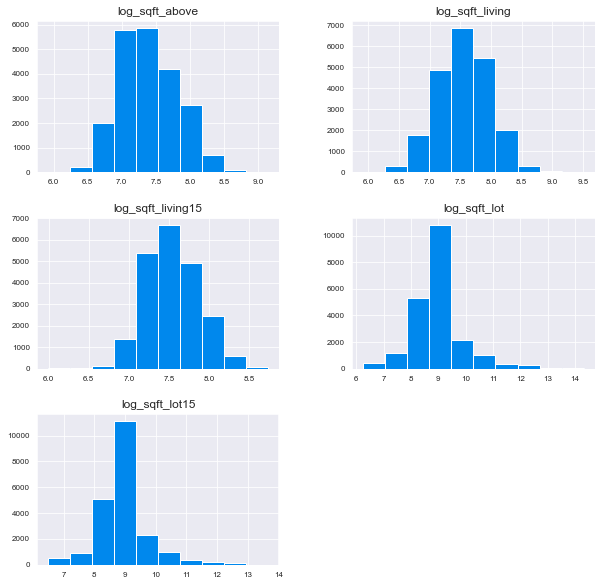

In [412]:
#create new log transformed columns for variables and plot histograms
log_sqft_living = np.log(kchouse_qrtrs['sqft_living'])
log_sqft_lot = np.log(kchouse_qrtrs['sqft_lot'])
log_sqft_above = np.log(kchouse_qrtrs['sqft_above'])
log_sqft_living15 = np.log(kchouse_qrtrs['sqft_living15'])
log_sqft_lot15 = np.log(kchouse_qrtrs['sqft_lot15'])

logs = ['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15']

log_kchouse_qrtrs['log_sqft_living'] = log_sqft_living
log_kchouse_qrtrs['log_sqft_lot'] = log_sqft_lot
log_kchouse_qrtrs['log_sqft_above'] = log_sqft_above
log_kchouse_qrtrs['log_sqft_living15'] = log_sqft_living15
log_kchouse_qrtrs['log_sqft_lot15'] = log_sqft_lot15

log_kchouse_qrtrs[logs].hist(figsize=(10,10));

In [413]:
log_kchouse_qrtrs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city,livable,q2_2014,q3_2014,q4_2014,q1_2015,q2_2015,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_living15,log_sqft_lot15
0,7129300520,2014-10-13,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,...,Seattle,1,0,0,1,0,0,7.07326971745971,8.639410824140487,7.07326971745971,7.200424892944957,8.639410824140487
1,6414100192,2014-12-09,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,Seattle,1,0,0,1,0,0,7.851661177889265,8.887652690325586,7.682482446534506,7.432483807917119,8.94102198354136
2,5631500400,2015-02-25,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,...,Kenmore,1,0,0,0,1,0,6.646390514847729,9.210340371976184,6.646390514847729,7.908387159290043,8.994916943677111
3,2487200875,2014-12-09,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,...,Seattle,1,0,0,1,0,0,7.580699752224563,8.517193191416238,6.956545443151569,7.215239978730097,8.517193191416238
4,1954400510,2015-02-18,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,...,Sammamish,1,0,0,0,1,0,7.426549072397305,8.997147151515142,7.426549072397305,7.495541943884256,8.923058219545728


#### OLS - Logs

In [416]:
#call OLS Regression summary
data = log_kchouse_qrtrs
target = 'price'
x_cols = log_kchouse_qrtrs.drop([target, 'date','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = target + '~' + predictors

model = smf.ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1457.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:45:34   Log-Likelihood:            -2.9122e+05
No. Observations:               21593   AIC:                         5.825e+05
Df Residuals:                   21541   BIC:                         5.830e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.863e+07   6.41e+06      7.589      0.000    3.61e+07    6.12e+07
city[T.Bellevue]       1.842e+05   9583.148     19.219      0.000    1.65e+05    2.03e+05
city[T.Black Diamond]  1.053e+05   1.96e+04      5.370      0.000    6.69e+04    1.44e+05
city[T.Bothell]       -1.212e+05   1.62e+04     -7.495      0.000   -1.53e+05   -8.95e+04
city[T.Carnation]      3.126e+04   2.14e+04      1.463      0.144   -1.06e+04    7.32e+04
city[T.Duvall]        -4.004e+04   1.81e+04     -2.216      0.027   -7.55e+04   -4618.763
city[T.Enumclaw]       1.059e+05   1.46e+04      7.229      0.000    7.72e+04    1.35e+05
city[T.Fall City]      1.178e+05    2.3e+04      5.116      0.000    7.27e+04    1.63e+05
city[T.Federal Way]   -9.309e+04   9325.715     -9.982      0.000   -1.11e+05   -7.48e+04
city[T.Issaquah]       9.872e+04   1.14e+04      8.661      0.000    7.64e+04    1.21e+05
city[T.Kenmore]       -1.179e+05   1.46e+04     -8.054      0.000   -1.47e+05   -8.92e+04
city[T.Kent]          -5506.7017   7967.729     -0.691      0.489   -2.11e+04    1.01e+04
city[T.Kirkland]       7.207e+04   1.11e+04      6.469      0.000    5.02e+04    9.39e+04
city[T.Maple Valley]   7.396e+04   1.08e+04      6.826      0.000    5.27e+04    9.52e+04
city[T.Medina]         1.042e+06   2.64e+04     39.539      0.000    9.91e+05    1.09e+06
city[T.Mercer Island]  3.195e+05   1.31e+04     24.325      0.000    2.94e+05    3.45e+05
city[T.North Bend]     1.872e+05   1.91e+04      9.806      0.000     1.5e+05    2.25e+05
city[T.Redmond]        8.836e+04   1.19e+04      7.435      0.000    6.51e+04    1.12e+05
city[T.Renton]         1.906e+04   8442.441      2.258      0.024    2515.656    3.56e+04
city[T.Sammamish]      1.009e+05   1.23e+04      8.189      0.000    7.68e+04    1.25e+05
city[T.Seattle]        1.337e+05   1.25e+04     10.698      0.000    1.09e+05    1.58e+05
city[T.Snoqualmie]     1.184e+05   1.65e+04      7.171      0.000    8.61e+04    1.51e+05
city[T.Vashon]        -6.214e+04   1.95e+04     -3.192      0.001      -1e+05    -2.4e+04
city[T.Woodinville]   -5787.1867   1.42e+04     -0.407      0.684   -3.37e+04    2.21e+04
q2_2014[T.1]           9.714e+06   1.28e+06      7.580      0.000     7.2e+06    1.22e+07
q3_2014[T.1]           9.713e+06   1.28e+06      7.579      0.000     7.2e+06    1.22e+07
q4_2014[T.1]           9.713e+06   1.28e+06      7.579      0.000     7.2e+06    1.22e+07
q1_2015[T.1]           9.736e+06   1.28e+06      7.596      0.000    7.22e+06    1.22e+07
q2_2015[T.1]           9.756e+06   1.28e+06      7.612      0.000    7.24e+06    1.23e+07
bedrooms              -1.574e+04   1806.400     -8.713      0.000   -1.93e+04   -1.22e+04
bathrooms              4.267e+04   2873.245     14.851      0.000     3.7e+04    4.83e+04
sqft_living            

R-Squared Value still .775 with log transforms.

### Exporting out dataset

In [415]:
#log_kchouse_qrtrs.to_csv('kchouse_model.csv')